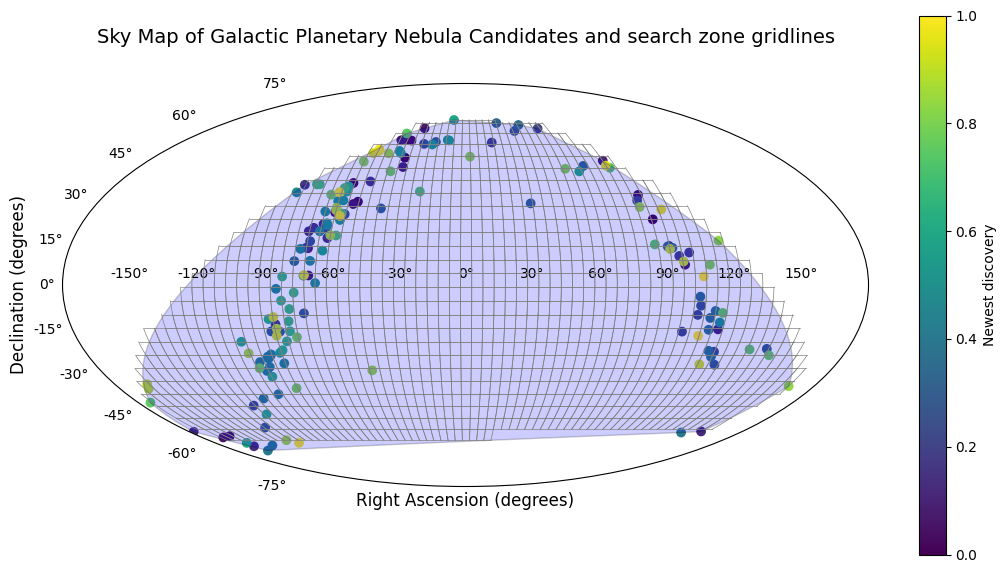

In [1]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
from matplotlib.path import Path

# Check if a point is inside the convex hull
def point_in_hull(point, hull):
    path = Path(hull)
    return path.contains_points([point])

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('output33.csv')

# Convert the RA and DEC columns to astropy SkyCoord objects
coords = SkyCoord(df['RA'], df['DEC'], unit=(u.hourangle, u.deg))

# Normalize the row index of the DataFrame
norm_index = np.arange(len(df)) / (len(df) - 1)

# Set up a colormap to map normalized row index to color
cmap = plt.get_cmap('viridis')

# Plot the coordinates on a sky map, with colors based on normalized row index
fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot(111, projection='mollweide')
scat = ax.scatter(coords.ra.wrap_at(180*u.deg).radian, coords.dec.radian, c=norm_index, cmap=cmap)
ax.grid(False)

# Compute the convex hull of the plotted points with higher precision
points = np.array([coords.ra.wrap_at(180*u.deg).radian, coords.dec.radian]).T

hull = ConvexHull(points, qhull_options="QbB Qt Q12")

# Determine the minimum and maximum RA and DEC values of the convex hull vertices
min_ra, max_ra = np.min(points[hull.vertices, 0]), np.max(points[hull.vertices, 0])
min_dec, max_dec = np.min(points[hull.vertices, 1]), np.max(points[hull.vertices, 1])

# Create the grid lines for the hull area
ra_grid = np.arange(min_ra, max_ra, 5 * u.deg.to(u.rad))
dec_grid = np.arange(min_dec, max_dec, 5 * u.deg.to(u.rad))

# Create an empty list to store the coordinates of each gridline square inside the hull
gridline_squares = []

# Loop over each 5-degree interval in RA and DEC
for ra_start in ra_grid:
    ra_end = ra_start + 5 * u.deg.to(u.rad)
    for dec_start in dec_grid:
        dec_end = dec_start + 5 * u.deg.to(u.rad)
        
        # Check if the bottom-left corner of the square is inside the hull
        if point_in_hull([ra_start, dec_start], points[hull.vertices]):
            # Determine the minimum and maximum RA and DEC values of the square
            ra_min, ra_max = max(ra_start, min_ra), min(ra_end, max_ra)
            dec_min, dec_max = max(dec_start, min_dec), min(dec_end, max_dec)
            
            # Append the coordinates of the square to the list
            gridline_squares.append((ra_min, ra_max, dec_min, dec_max))

            # Plot the gridline square
            ax.plot([ra_min, ra_min], [dec_min, dec_max], color='gray', linestyle='-', linewidth=0.5)
            ax.plot([ra_min, ra_max], [dec_min, dec_min], color='gray', linestyle='-', linewidth=0.5)
            ax.plot([ra_max, ra_max], [dec_min, dec_max], color='gray', linestyle='-', linewidth=0.5)
            ax.plot([ra_min, ra_max], [dec_max, dec_max], color='gray', linestyle='-', linewidth=0.5)

# Plot the convex hull as a closed polygon
hull_poly = plt.Polygon(points[hull.vertices], alpha=0.2, edgecolor='black', facecolor='blue')
ax.add_patch(hull_poly)

#convert gridline_squares to degrees
gridline_squares = np.array(gridline_squares)
gridline_squares = gridline_squares * u.rad.to(u.deg)

# Add a colorbar to the sky map
cb = plt.colorbar(scat)
cb.set_label('Newest discovery', fontsize=10)

# Add labels for the RA and DEC coordinates
ax.set_xlabel('Right Ascension (degrees)', fontsize=12)
ax.set_ylabel('Declination (degrees)', fontsize=12)

# Add a title at the top of the sky map
plt.title('Sky Map of Galactic Planetary Nebula Candidates and search zone gridlines', fontsize=14, y=1.08)

# Show the sky map
plt.show()

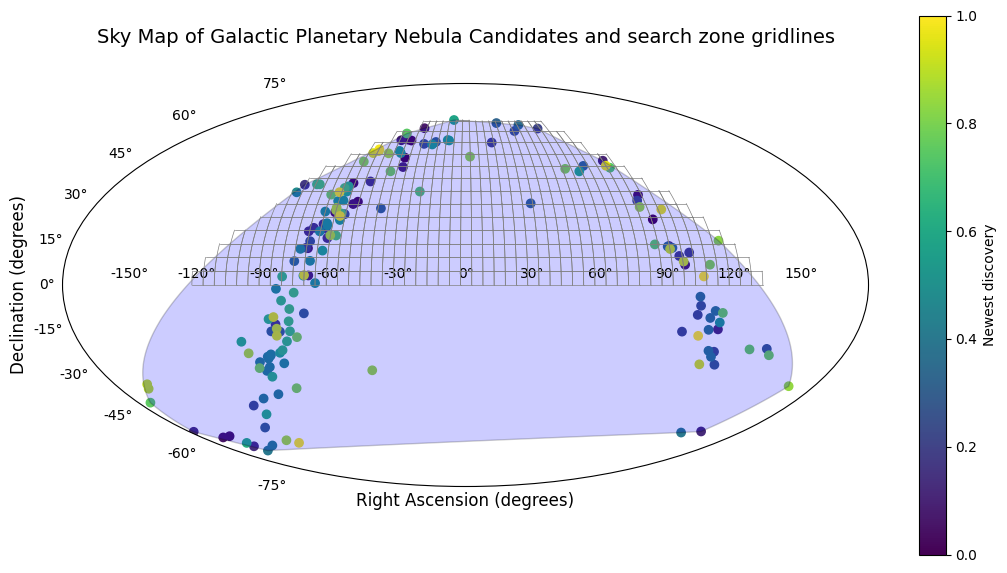

In [1]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
from matplotlib.path import Path

# Check if a point is inside the convex hull
def point_in_hull(point, hull):
    path = Path(hull)
    return path.contains_points([point])

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('output33.csv')

# Convert the RA and DEC columns to astropy SkyCoord objects
coords = SkyCoord(df['RA'], df['DEC'], unit=(u.hourangle, u.deg))

# Normalize the row index of the DataFrame
norm_index = np.arange(len(df)) / (len(df) - 1)

# Set up a colormap to map normalized row index to color
cmap = plt.get_cmap('viridis')

# Plot the coordinates on a sky map, with colors based on normalized row index
fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot(111, projection='mollweide')
scat = ax.scatter(coords.ra.wrap_at(180*u.deg).radian, coords.dec.radian, c=norm_index, cmap=cmap)
ax.grid(False)

# Compute the convex hull of the plotted points with higher precision
points = np.array([coords.ra.wrap_at(180*u.deg).radian, coords.dec.radian]).T

hull = ConvexHull(points, qhull_options="QbB Qt Q12")

# Determine the minimum and maximum RA and DEC values of the convex hull vertices
min_ra, max_ra = np.min(points[hull.vertices, 0]), np.max(points[hull.vertices, 0])
min_dec, max_dec = np.min(points[hull.vertices, 1]), np.max(points[hull.vertices, 1])

# Create the grid lines for the hull area
ra_grid = np.arange(min_ra, max_ra, 5 * u.deg.to(u.rad))
dec_grid = np.arange(0, max_dec, 5 * u.deg.to(u.rad))

# Create an empty list to store the coordinates of each gridline square inside the hull
gridline_squares = []

# Loop over each 5-degree interval in RA and DEC
for ra_start in ra_grid:
    ra_end = ra_start + 5 * u.deg.to(u.rad)
    for dec_start in dec_grid:
        dec_end = dec_start + 5 * u.deg.to(u.rad)
        
        # Check if the bottom-left corner of the square is inside the hull
        if point_in_hull([ra_start, dec_start], points[hull.vertices]):
            # Determine the minimum and maximum RA and DEC values of the square
            ra_min, ra_max = max(ra_start, min_ra), min(ra_end, max_ra)
            dec_min, dec_max = max(dec_start, min_dec), min(dec_end, max_dec)
            
            # Append the coordinates of the square to the list
            gridline_squares.append((ra_min, ra_max, dec_min, dec_max))

            # Plot the gridline square
            ax.plot([ra_min, ra_min], [dec_min, dec_max], color='gray', linestyle='-', linewidth=0.5)
            ax.plot([ra_min, ra_max], [dec_min, dec_min], color='gray', linestyle='-', linewidth=0.5)
            ax.plot([ra_max, ra_max], [dec_min, dec_max], color='gray', linestyle='-', linewidth=0.5)
            ax.plot([ra_min, ra_max], [dec_max, dec_max], color='gray', linestyle='-', linewidth=0.5)

# Plot the convex hull as a closed polygon
hull_poly = plt.Polygon(points[hull.vertices], alpha=0.2, edgecolor='black', facecolor='blue')
ax.add_patch(hull_poly)

#convert gridline_squares to degrees
gridline_squares = np.array(gridline_squares)
gridline_squares = gridline_squares * u.rad.to(u.deg)

# Add a colorbar to the sky map
cb = plt.colorbar(scat)
cb.set_label('Newest discovery', fontsize=10)

# Add labels for the RA and DEC coordinates
ax.set_xlabel('Right Ascension (degrees)', fontsize=12)
ax.set_ylabel('Declination (degrees)', fontsize=12)

# Add a title at the top of the sky map
plt.title('Sky Map of Galactic Planetary Nebula Candidates and search zone gridlines', fontsize=14, y=1.08)

# Show the sky map
plt.show()

In [4]:
import csv
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits
import numpy as np
import cv2
from astropy.coordinates import Angle
from urllib.parse import urlencode
from sklearn.preprocessing import minmax_scale
import re
import requests
from astroquery.simbad import Simbad
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Rectangle
from concurrent.futures import ThreadPoolExecutor

def ra_molweid_to_degree(ra_molweid):
    ra = 0
    if ra_molweid < 0:
        ra = -ra_molweid
    else:
        ra = 360 - ra_molweid
    
    return ra

def download_and_process_image(params):
    ra_center, dec_center, fov_size = params

    # Define the resolution of the image
    largeur = 512
    hauteur = 512

    ra_center_d = ra_molweid_to_degree(ra_center)

    # Construct the request URLs for the hips2fits service for the DSS2 Red and DSS2 Blue filters
    query_params_red={
        'hips':'DSS2 red',
        'ra':ra_center_d,
        'dec':dec_center,
        'fov':fov_size,
        'width':largeur,
        'height':hauteur
    }
    url_red = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params_red)}'

    query_params_blue={
        'hips':'DSS2 blue',
        'ra':ra_center_d,
        'dec':dec_center,
        'fov':fov_size,
        'width':largeur,
        'height':hauteur
    }
    url_blue = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params_blue)}'

    # Download the images from the Aladin Sky Atlas server
    hdul_red = fits.open(url_red)
    hdul_blue = fits.open(url_blue)

    image_red = hdul_red[0].data
    image_blue = hdul_blue[0].data

    # Normalize the pixel values between 0 and 1 for each filter
    image_min_red = np.min(image_red)
    image_max_red = np.max(image_red)
    image_norm_red = (image_red - image_min_red) / (image_max_red - image_min_red)

    image_min_blue = np.min(image_blue)
    image_max_blue = np.max(image_blue)
    image_norm_blue = (image_blue - image_min_blue) / (image_max_blue - image_min_blue)

    # Combine the preprocessed images from both filters into a single dataset
    images = np.stack([image_norm_red, image_norm_blue], axis=-1)
    images = np.flipud(images)
    
    return images, ra_center, dec_center, fov_size


def download_and_process_sky_region(ra_min, ra_max, dec_min, dec_max):
    ra_min = ra_min * u.degree
    ra_max = ra_max * u.degree
    dec_min = dec_min * u.degree
    dec_max = dec_max * u.degree

    # Define the range of FOV sizes in degrees
    fov_min = 10/60 # minimum FOV size in degrees
    fov_max = 20.0/60 # maximum FOV size in degrees
    fov_step = 5/60 # step size for FOV sizes in degrees

    # Calculate the maximum number of subregions that can fit in each dimension
    n_subregions_ra = int(np.ceil(ra_max.to_value(u.degree) - ra_min.to_value(u.degree)) / fov_max)
    n_subregions_dec = int(np.ceil(dec_max.to_value(u.degree) - dec_min.to_value(u.degree)) / fov_max)

    # Divide the region into sub-regions
    ra_subregions = np.linspace(ra_min.to_value(u.degree), ra_max.to_value(u.degree), n_subregions_ra)
    dec_subregions = np.linspace(dec_min.to_value(u.degree), dec_max.to_value(u.degree), n_subregions_dec)

    # Define the array of FOV sizes in degrees
    fov_choices = np.arange(fov_min, fov_max+fov_step, fov_step)

    # Initialize lists to store the RA, Dec, and FOV of each image
    ra_list = []
    dec_list = []
    fov_list = []
    all_images = []

    # Initialize lists to store the RA, Dec, and FOV of each image
    params_list = []

    # Prepare the list of parameters for each sub-region and FOV size
    for ra_center in ra_subregions:
        for dec_center in dec_subregions:
            for fov_size in fov_choices:
                params_list.append((ra_center, dec_center, fov_size))

    # Initialize a global progress bar
    pbar = tqdm(total=len(params_list), desc='Downloading images')

    # Define a function to be executed after each task is completed
    def update_and_store_result(future):
        images, ra_center, dec_center, fov_size = future.result()
        all_images.append(images)
        ra_list.append(ra_center)
        dec_list.append(dec_center)
        fov_list.append(fov_size)
        pbar.update(1)

    # Use ThreadPoolExecutor to parallelize the download process
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(download_and_process_image, params) for params in params_list]
        for future in futures:
            future.add_done_callback(update_and_store_result)

    # Close the global progress bar
    pbar.close()

    # Convert the lists of RA, Dec, and FOV to NumPy arrays
    ra_list = np.array(ra_list)
    dec_list = np.array(dec_list)
    fov_list = np.array(fov_list)

    # Convert the list of all images to a NumPy array
    all_images = np.array(all_images)

    return all_images, ra_list, dec_list, fov_list, ra_subregions, dec_subregions, fov_choices, n_subregions_ra, n_subregions_dec, fov_max

if __name__ == '__main__':
    ra_min = 75.0
    ra_max = 80.0
    dec_min = 0
    dec_max = 5.0

    all_images, ra_list, dec_list, fov_list, ra_subregions, dec_subregions, fov_choices, n_subregions_ra, n_subregions_dec, fov_max = download_and_process_sky_region(ra_min, ra_max, dec_min, dec_max)

    # Create a plot to show the subregions
    fig = plt.figure(figsize=(10, 10))

    # Create a single subplot with the large FOV that covers all the sub-regions
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(f'Sky Division')
    ax.set_xlabel('RA (J2000)')
    ax.set_ylabel('Dec (J2000)')

    # Calculate the maximum FOV that covers all the subregions
    large_fov_ra = (ra_subregions[-1] - ra_subregions[0]) + fov_choices[-1]
    large_fov_dec = (dec_subregions[-1] - dec_subregions[0]) + fov_choices[-1]
    large_fov = max(large_fov_ra, large_fov_dec)

    # Set the limits of the plot to show the entire large FOV
    ax.set_xlim((ra_min+ra_max)/2-large_fov/2-2, (ra_min+ra_max)/2+large_fov/2+2)
    ax.set_ylim((dec_min+dec_max)/2-large_fov/2-2, (dec_min+dec_max)/2+large_fov/2+2)

    # Loop over each sub-region and FOV size and plot a rectangle within the large FOV subplot for each combination
    for i in range(len(ra_list)):
        rect = Rectangle((ra_list[i]-fov_list[i]/2, dec_list[i]-fov_list[i]/2), fov_list[i], fov_list[i], fill=False, edgecolor='lime', linewidth=0.5)
        ax.add_patch(rect)

    # Plot a rectangle to show the entire sky region
    rect = Rectangle((ra_min, dec_min), ra_max-ra_min, dec_max-dec_min, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

    plt.show()

Traceback (most recent call last):
  File "d:\prgrammes\Anaconda\envs\tf\lib\urllib\request.py", line 1346, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 1285, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 1331, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 1280, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 1040, in _send_output
    self.send(msg)
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 980, in send
    self.connect()
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 946, in connect
    self.sock = self._create_connection(
  File "d:\prgrammes\Anaconda\envs\tf\lib\socket.py

exception calling callback for <Future at 0x27f83cacf70 state=finished raised URLError>
Traceback (most recent call last):
  File "d:\prgrammes\Anaconda\envs\tf\lib\urllib\request.py", line 1346, in do_open
    h.request(req.get_method(), req.selector, req.data, headers,
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 1285, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 1331, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 1280, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 1040, in _send_output
    self.send(msg)
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 980, in send
    self.connect()
  File "d:\prgrammes\Anaconda\envs\tf\lib\http\client.py", line 946, in connect
    

In [3]:
import numpy as np
from PIL import Image
import os
from tqdm import tqdm

def save_images(all_images, ra_list, dec_list, fov_list, base_dir="image_data_nebula", image_dir="images"):
    """
    Saves a list of images to a specified directory after emptying it.

    Args:
        all_images (list): A list of NumPy arrays representing images.
        base_dir (str): The base directory where the images will be saved.
            Defaults to "image_data_nebula".
        image_dir (str): The subdirectory where the images will be saved.
            Defaults to "images".
        ra_list (list): A list of right ascension values for each image.
        dec_list (list): A list of declination values for each image.
        fov_list (list): A list of field of view values for each image.
    """
    # Define the directory where the images will be saved
    os.makedirs(base_dir, exist_ok=True)
    image_dir = os.path.join(base_dir, image_dir)
    os.makedirs(image_dir, exist_ok=True)

    # Empty the directory before saving the images
    for filename in os.listdir(image_dir):
        file_path = os.path.join(image_dir, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)

    # Save the images to the directory
    with tqdm(total=len(all_images), desc=f"Saving images to {image_dir}") as pbar:
        for i, img in enumerate(all_images):
            ra = ra_list[i] 
            dec = dec_list[i] 
            fov = fov_list[i]
            img_path = os.path.join(image_dir, f"image_{i}_{ra}_{dec}_{fov}.jpg")
            if len(img.shape) == 2:
                # Convert 2D grayscale image to 3D RGB image
                img = np.stack([img, img, img], axis=-1)
            elif len(img.shape) == 3 and img.shape[-1] == 2:
                # Convert 2D color image with 2 channels to 3D RGB image
                img = np.concatenate([img, np.zeros_like(img)], axis=-1)
            pil_img = Image.fromarray((img * 255).astype(np.uint8))
            if pil_img.mode == 'RGBA':
                pil_img = pil_img.convert('RGB')
            pil_img.save(img_path)

            # Update progress bar
            pbar.update()

    # Print completion message
    print(f"All {len(all_images)} images saved to {image_dir}")

    #free ram
    del all_images

if __name__ == '__main__':
    save_images(all_images, ra_list=ra_list, dec_list=dec_list, fov_list=fov_list)

Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:11<00:00, 60.04it/s]

All 675 images saved to image_data_nebula\images


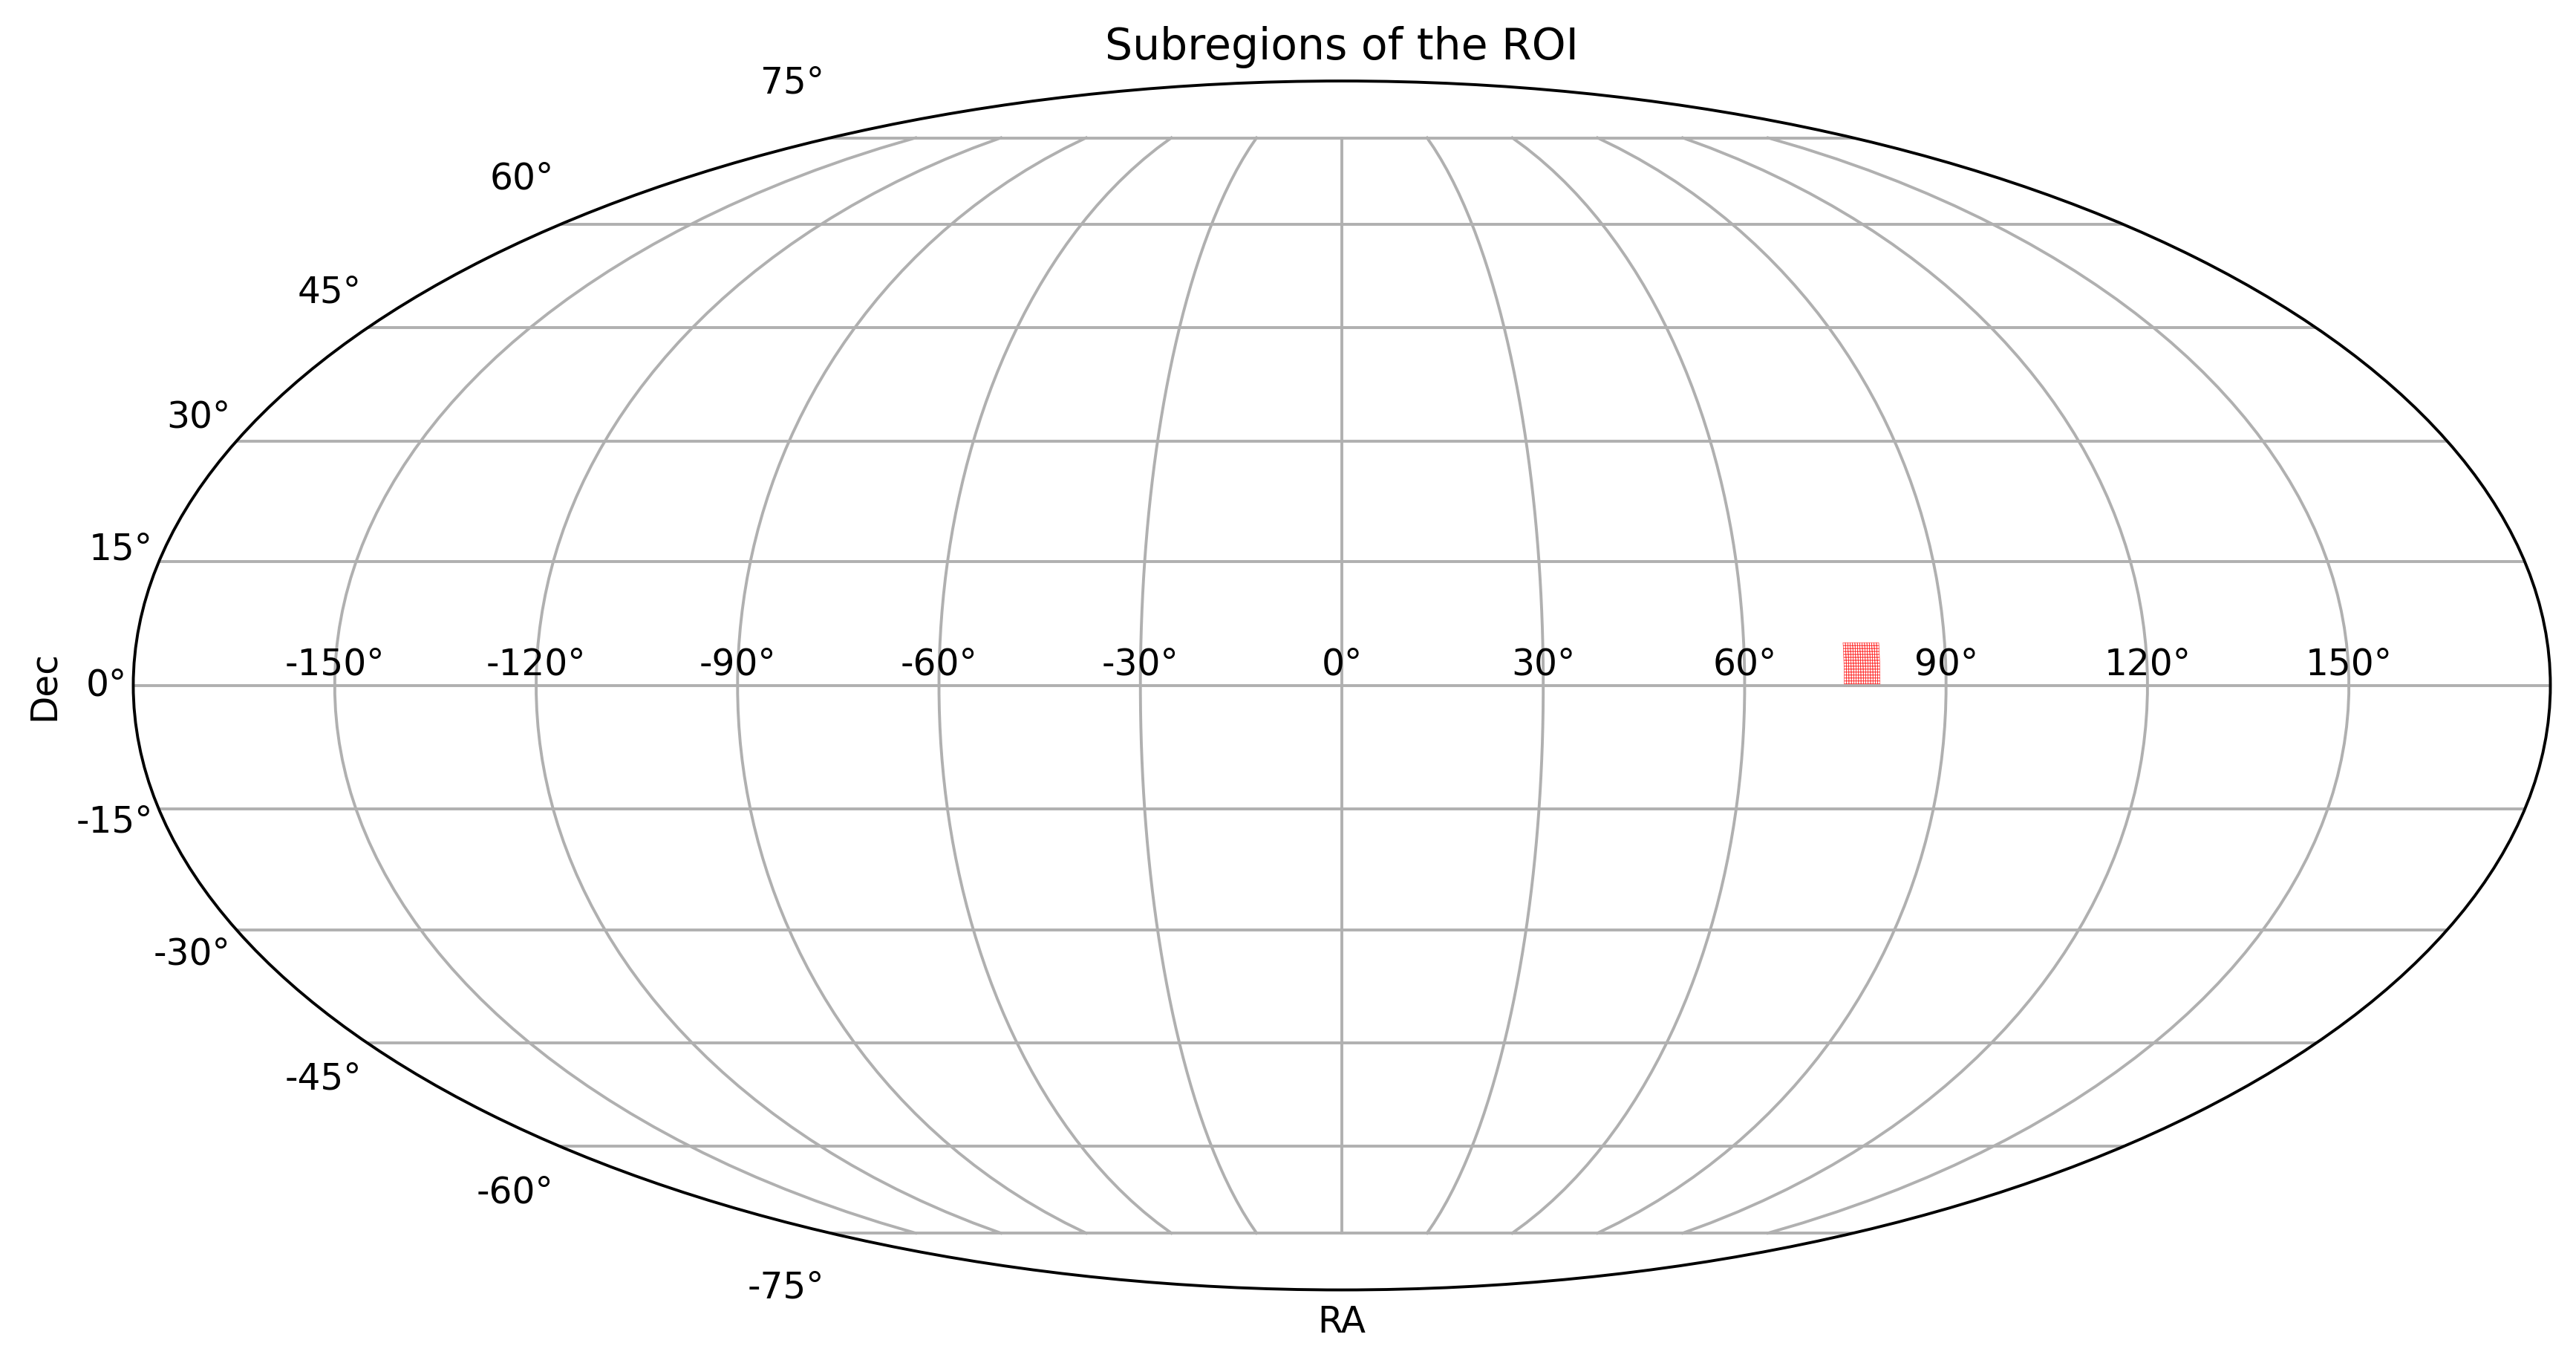

In [13]:
import matplotlib.pyplot as plt
from astropy import units as u

def ra_molweid_to_degree2(ra_molweid):
    if ra_molweid < 0*u.degree:
        ra = -ra_molweid.to(u.degree)
    else:
        ra = 360*u.degree - ra_molweid.to(u.degree)
    return ra
    
# Define the coordinates of the centers of each sub-region
ra_centers = ra_subregions*u.degree
dec_centers = dec_subregions*u.degree
coords = coord.SkyCoord(ra=ra_centers, dec=dec_centers)

# Plot the skymap
fig = plt.figure(figsize=(12,8), dpi = 350)
ax = fig.add_subplot(111, projection="mollweide")
ax.grid(True)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
ax.set_title("Subregions of the ROI")

# Plot the squares for each sub-region
for i in range(n_subregions_ra):
    for j in range(n_subregions_dec):
        ra = ra_centers[i]
        #ra = ra_molweid_to_degree2(ra)
        dec = dec_centers[j]
        fov = fov_max*u.degree
        x = Angle(ra-fov/2).wrap_at(180*u.degree).radian
        y = dec-fov/2
        width = fov.to_value(u.radian)
        height = fov.to_value(u.radian)
        rect = plt.Rectangle((x,y.to_value(u.radian)), width, height, fill=None, edgecolor='red', linewidth=0.1)
        ax.add_patch(rect)

# Show the plot
plt.show()

In [4]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 

def predict_nebula_images(data_dir, model_path, ra_list, dec_list, fov_list):
    batch_size = 8
    
    def preprocess_input(img):
        img = cv2.resize(img, (512, 512))
        img = img / 127.5 - 1
        return img
    
    # Load the saved model with the best validation accuracy
    model = tf.keras.models.load_model(model_path)

    # Define the data generator for the images
    data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
    generator = data_gen.flow_from_directory(
        data_dir,
        target_size=(512, 512),
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical'
    )

    class_names = generator.class_indices.keys()

    # Get the predicted labels for the images
    predictions = model.predict(generator)
    predicted_labels = np.argmax(predictions, axis=-1)

    # Get the true labels for the images
    true_labels = generator.classes

    # Create a dictionary that maps image filenames to their corresponding coordinates (ra, dec, fov)
    filename_to_coordinates = {filename: (ra, dec, fov) for filename, ra, dec, fov in zip(generator.filenames, ra_list, dec_list, fov_list)}

    # Create a list of positive class image filenames and predicted labels
    positive_class_index = 0
    positive_filenames = [filename for i, filename in enumerate(generator.filenames) if true_labels[i] == positive_class_index]
    positive_indices = [i for i, filename in enumerate(generator.filenames) if filename in positive_filenames]
    positive_directory_names = [os.path.dirname(filename) for filename in positive_filenames]
    positive_predicted_labels = predicted_labels[positive_indices]

    # Convert class_names to a list
    class_names = list(generator.class_indices.keys())

    # Save predicted class and certainty for each positive image in a list of dictionaries
    predictions_list = []
    for i, filename in enumerate(positive_filenames):
        predicted_class = positive_predicted_labels[i]
        directory_name = positive_directory_names[i]
        if predicted_class < len(class_names):
            class_name = class_names[predicted_class]
        else:
            class_name = "not a nebula"
        certainty = round(predictions[:, generator.class_indices[directory_name]][positive_indices[i]] * 100, 2)
        ra, dec, fov = filename_to_coordinates[filename]
        predictions_list.append({"filename": filename, "class_name": class_name, "certainty": certainty, "ra": ra, "dec": dec, "fov": fov})

    # Return the list of predictions
    return predictions_list

predictions_list = predict_nebula_images("image_data_nebula", "nebula_best2.h5", ra_list, dec_list, fov_list)

Found 675 images belonging to 1 classes.
85/85 [==============================] - 65s 427ms/step


In [5]:
import os

# Define the function to select the detected nebulae 
def select_nebulae(predictions_list, min_certainty=50):
    # Create a list of dictionaries of the predicted nebulae
    nebulae_list = []
    for i, prediction in enumerate(predictions_list):
        if prediction["certainty"] >= min_certainty:
            nebulae_list.append(prediction)
    # Create the nebulae subfolder if it doesn't exist
    if not os.path.exists("nebulae"):
        os.makedirs("nebulae")
    # Save the corresponding images to a subfolder
    for i, nebula in enumerate(nebulae_list):
        img_filename = "image_data_nebula/" + nebula["filename"]
        img = cv2.imread(img_filename)
        # Set the new filename based on the old filename and the nebula information
        old_filename = os.path.splitext(nebula["filename"])[0]
        old_filename = old_filename.split("_")
        old_filename1 = old_filename[2]
        old_filename2 = old_filename[3]
        old_filename3 = old_filename[4]
        new_filename = "{}_{}_{}_{}.jpg".format(nebula["certainty"], old_filename1, old_filename2, old_filename3)
        save_filename = "nebulae/" + new_filename
        cv2.imwrite(save_filename, img)
    return nebulae_list

nebulae_list = select_nebulae(predictions_list)

In [6]:
import time
import astropy.utils.data
#define the main program function

def main():
    for i, gridline in enumerate(gridline_squares):
        if i < 456 : 
            continue
        print(i)
        print(gridline[0], gridline[1], gridline[2], gridline[3])
        all_images, ra_list, dec_list, fov_list, ra_subregions, dec_subregions, fov_choices, n_subregions_ra, n_subregions_dec, fov_max = download_and_process_sky_region(gridline[0], gridline[1], gridline[2], gridline[3])
        #wait 1 sec 
        time.sleep(1)
        save_images(all_images, ra_list, dec_list, fov_list)
        time.sleep(1)
        predictions_list = predict_nebula_images("image_data_nebula", "nebula_best2.h5", ra_list, dec_list, fov_list)
        nebulae_list = select_nebulae(predictions_list)
        print("Found {} nebulae in the ROI".format(len(nebulae_list)))
        astropy.utils.data.clear_download_cache(hashorurl=None, pkgname='astropy')
    
if __name__ == "__main__":
    main()

456
97.77904166666632 102.77904166666632 25.0 29.999999999999996


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:13<00:00, 50.72it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 29s 303ms/step
Found 0 nebulae in the ROI
457
97.77904166666632 102.77904166666632 29.999999999999996 35.0


Saving images to image_data_nebula\images: 100%|██████████| 810/810 [00:16<00:00, 48.18it/s]


All 810 images saved to image_data_nebula\images
Found 810 images belonging to 1 classes.
102/102 [==============================] - 46s 360ms/step
Found 0 nebulae in the ROI
458
102.77904166666632 107.7790416666663 0.0 5.0


  image_norm_red = (image_red - image_min_red) / (image_max_red - image_min_red)
Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:11<00:00, 56.54it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 320ms/step
Found 81 nebulae in the ROI
459
102.77904166666632 107.7790416666663 5.0 10.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 64.09it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 332ms/step
Found 1 nebulae in the ROI
460
102.77904166666632 107.7790416666663 10.0 14.999999999999998


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:12<00:00, 55.10it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 328ms/step
Found 0 nebulae in the ROI
461
102.77904166666632 107.7790416666663 14.999999999999998 20.0


Saving images to image_data_nebula\images: 100%|██████████| 810/810 [00:14<00:00, 57.73it/s]


All 810 images saved to image_data_nebula\images
Found 810 images belonging to 1 classes.
102/102 [==============================] - 35s 335ms/step
Found 0 nebulae in the ROI
462
102.77904166666632 107.7790416666663 20.0 25.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:13<00:00, 48.44it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 330ms/step
Found 0 nebulae in the ROI
463
102.77904166666632 107.7790416666663 25.0 29.999999999999996


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 62.46it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 332ms/step
Found 0 nebulae in the ROI
464
107.7790416666663 112.7790416666663 0.0 5.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 63.89it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 331ms/step
Found 5 nebulae in the ROI
465
107.7790416666663 112.7790416666663 5.0 10.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 64.00it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 327ms/step
Found 0 nebulae in the ROI
466
107.7790416666663 112.7790416666663 10.0 14.999999999999998


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 67.22it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 331ms/step
Found 0 nebulae in the ROI
467
107.7790416666663 112.7790416666663 14.999999999999998 20.0


Saving images to image_data_nebula\images: 100%|██████████| 810/810 [00:12<00:00, 64.39it/s]


All 810 images saved to image_data_nebula\images
Found 810 images belonging to 1 classes.
102/102 [==============================] - 34s 330ms/step
Found 0 nebulae in the ROI
468
107.7790416666663 112.7790416666663 20.0 25.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 63.57it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 326ms/step
Found 0 nebulae in the ROI
469
112.7790416666663 117.7790416666663 0.0 5.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 63.52it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 328ms/step
Found 0 nebulae in the ROI
470
112.7790416666663 117.7790416666663 5.0 10.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:11<00:00, 60.50it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 331ms/step
Found 0 nebulae in the ROI
471
112.7790416666663 117.7790416666663 10.0 14.999999999999998


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:09<00:00, 67.56it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 332ms/step
Found 0 nebulae in the ROI
472
112.7790416666663 117.7790416666663 14.999999999999998 20.0


Saving images to image_data_nebula\images: 100%|██████████| 810/810 [00:12<00:00, 63.71it/s]


All 810 images saved to image_data_nebula\images
Found 810 images belonging to 1 classes.
102/102 [==============================] - 34s 332ms/step
Found 0 nebulae in the ROI
473
117.7790416666663 122.77904166666629 0.0 5.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 64.34it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 328ms/step
Found 0 nebulae in the ROI
474
117.7790416666663 122.77904166666629 5.0 10.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 64.33it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 329ms/step
Found 0 nebulae in the ROI
475
117.7790416666663 122.77904166666629 10.0 14.999999999999998


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 61.84it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 331ms/step
Found 0 nebulae in the ROI
476
122.77904166666629 127.77904166666629 0.0 5.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 64.21it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 331ms/step
Found 0 nebulae in the ROI
477
122.77904166666629 127.77904166666629 5.0 10.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:11<00:00, 57.38it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 29s 336ms/step
Found 0 nebulae in the ROI
478
127.77904166666629 132.77904166666627 0.0 5.0


Saving images to image_data_nebula\images: 100%|██████████| 675/675 [00:10<00:00, 64.96it/s]


All 675 images saved to image_data_nebula\images
Found 675 images belonging to 1 classes.
85/85 [==============================] - 28s 330ms/step
Found 0 nebulae in the ROI


In [1]:
import astropy.utils.data

astropy.utils.data.clear_download_cache(hashorurl=None, pkgname='astropy')

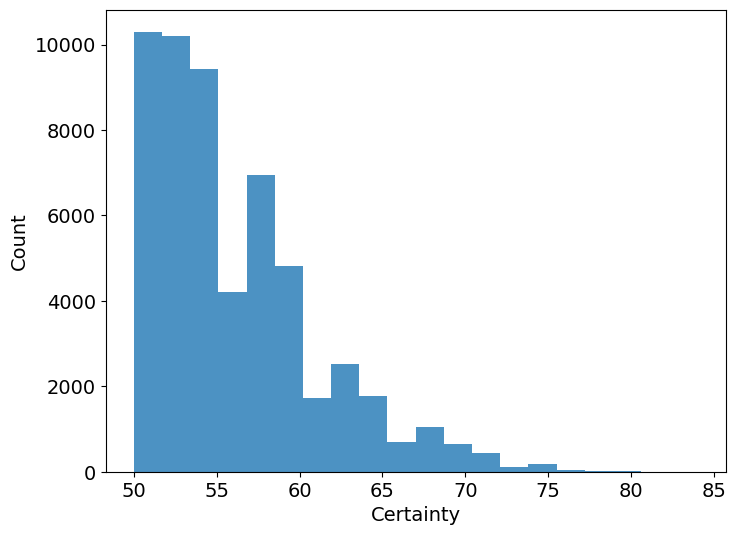

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
import re

# Define the path to the directory containing the images
image_dir = "nebulae/"

# Create an empty list to store the certainties
certainties = []

# Loop through the images in the directory
for filename in os.listdir(image_dir):
    # Extract the certainty value from the filename
    certainty = int(re.search(r'\d+', filename).group())
    # Add the certainty to the list
    certainties.append(certainty)

# Create a histogram of the certainties
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(certainties, bins=20, alpha=0.8)
ax.set_xlabel("Certainty", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [51]:
import os
import csv

def ra_molweid_to_degree(ra_molweid):
    ra = 0
    if ra_molweid < 0:
        ra = -ra_molweid
    else:
        ra = 360 - ra_molweid
    
    return ra

def deg_to_hms(deg):
    hours = int(deg / 15)
    minutes = int((deg / 15 - hours) * 60)
    seconds = ((deg / 15 - hours) * 60 - minutes) * 60
    return f"{hours:02}:{minutes:02}:{seconds:.2f}"

def deg_to_dms(deg):
    abs_deg = abs(deg)
    d = int(abs_deg)
    m = int((abs_deg - d) * 60)
    s = (abs_deg - d - m / 60) * 3600
    if deg < 0:
        d = -d
    return f"{d:+03}:{m:02}:{s:.1f}"

def retrieve_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            parts = filename.split("_")
            pre = float(parts[0])
            ra = float(parts[1])
            dec = float(parts[2])
            fov = float(parts[3].split(".jpg")[0])
            images.append({"ra": ra, "dec": dec, "fov": fov, "pre": pre})
    return images

images = retrieve_images("nebulae/")

# Open a CSV file for writing
with open("nebulae.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile, delimiter=';')

    # Write the header row
    writer.writerow(["RA", "DEC", "FOV (deg)", "Accuracy"])
    writer.writerow(["-------", "-------", "-------", "-------"])

    # Write data for each image
    for image in images:
        ra_deg = ra_molweid_to_degree(image["ra"])
        ra_str = deg_to_hms(ra_deg)
        dec_deg = image["dec"]
        dec_str = deg_to_dms(dec_deg)
        fov_deg = image["fov"]
        pre = image["pre"]
        if pre > 60 and fov_deg > 0.3 :
            writer.writerow([ra_str, dec_str, fov_deg, pre])

In [13]:
# Open the original CSV file and read its contents into a list
with open("nebula_not_in_clusters.csv", "r") as f:
    lines = f.readlines()

# Extract the header from the original CSV file
header = "".join(lines[:2])

# Remove the header from the list of lines
lines = lines[2:]

# Calculate the number of lines per split file (in this case, 2 lines per file)
lines_per_file = len(lines) // 10
if len(lines) % 10 != 0:
    lines_per_file += 1

# Loop through the lines and write them to separate files
for i in range(10):
    # Determine the start and end indices for the current split file
    start_index = i * lines_per_file
    end_index = min(start_index + lines_per_file, len(lines))

    # Write the lines to a new file
    filename = f"split_csv/split_{i+1}.csv"
    with open(filename, "w") as f:
        # Write the header to the file
        f.write(header)
        # Write the lines to the file
        f.writelines(lines[start_index:end_index])

Number of clusters found: 17


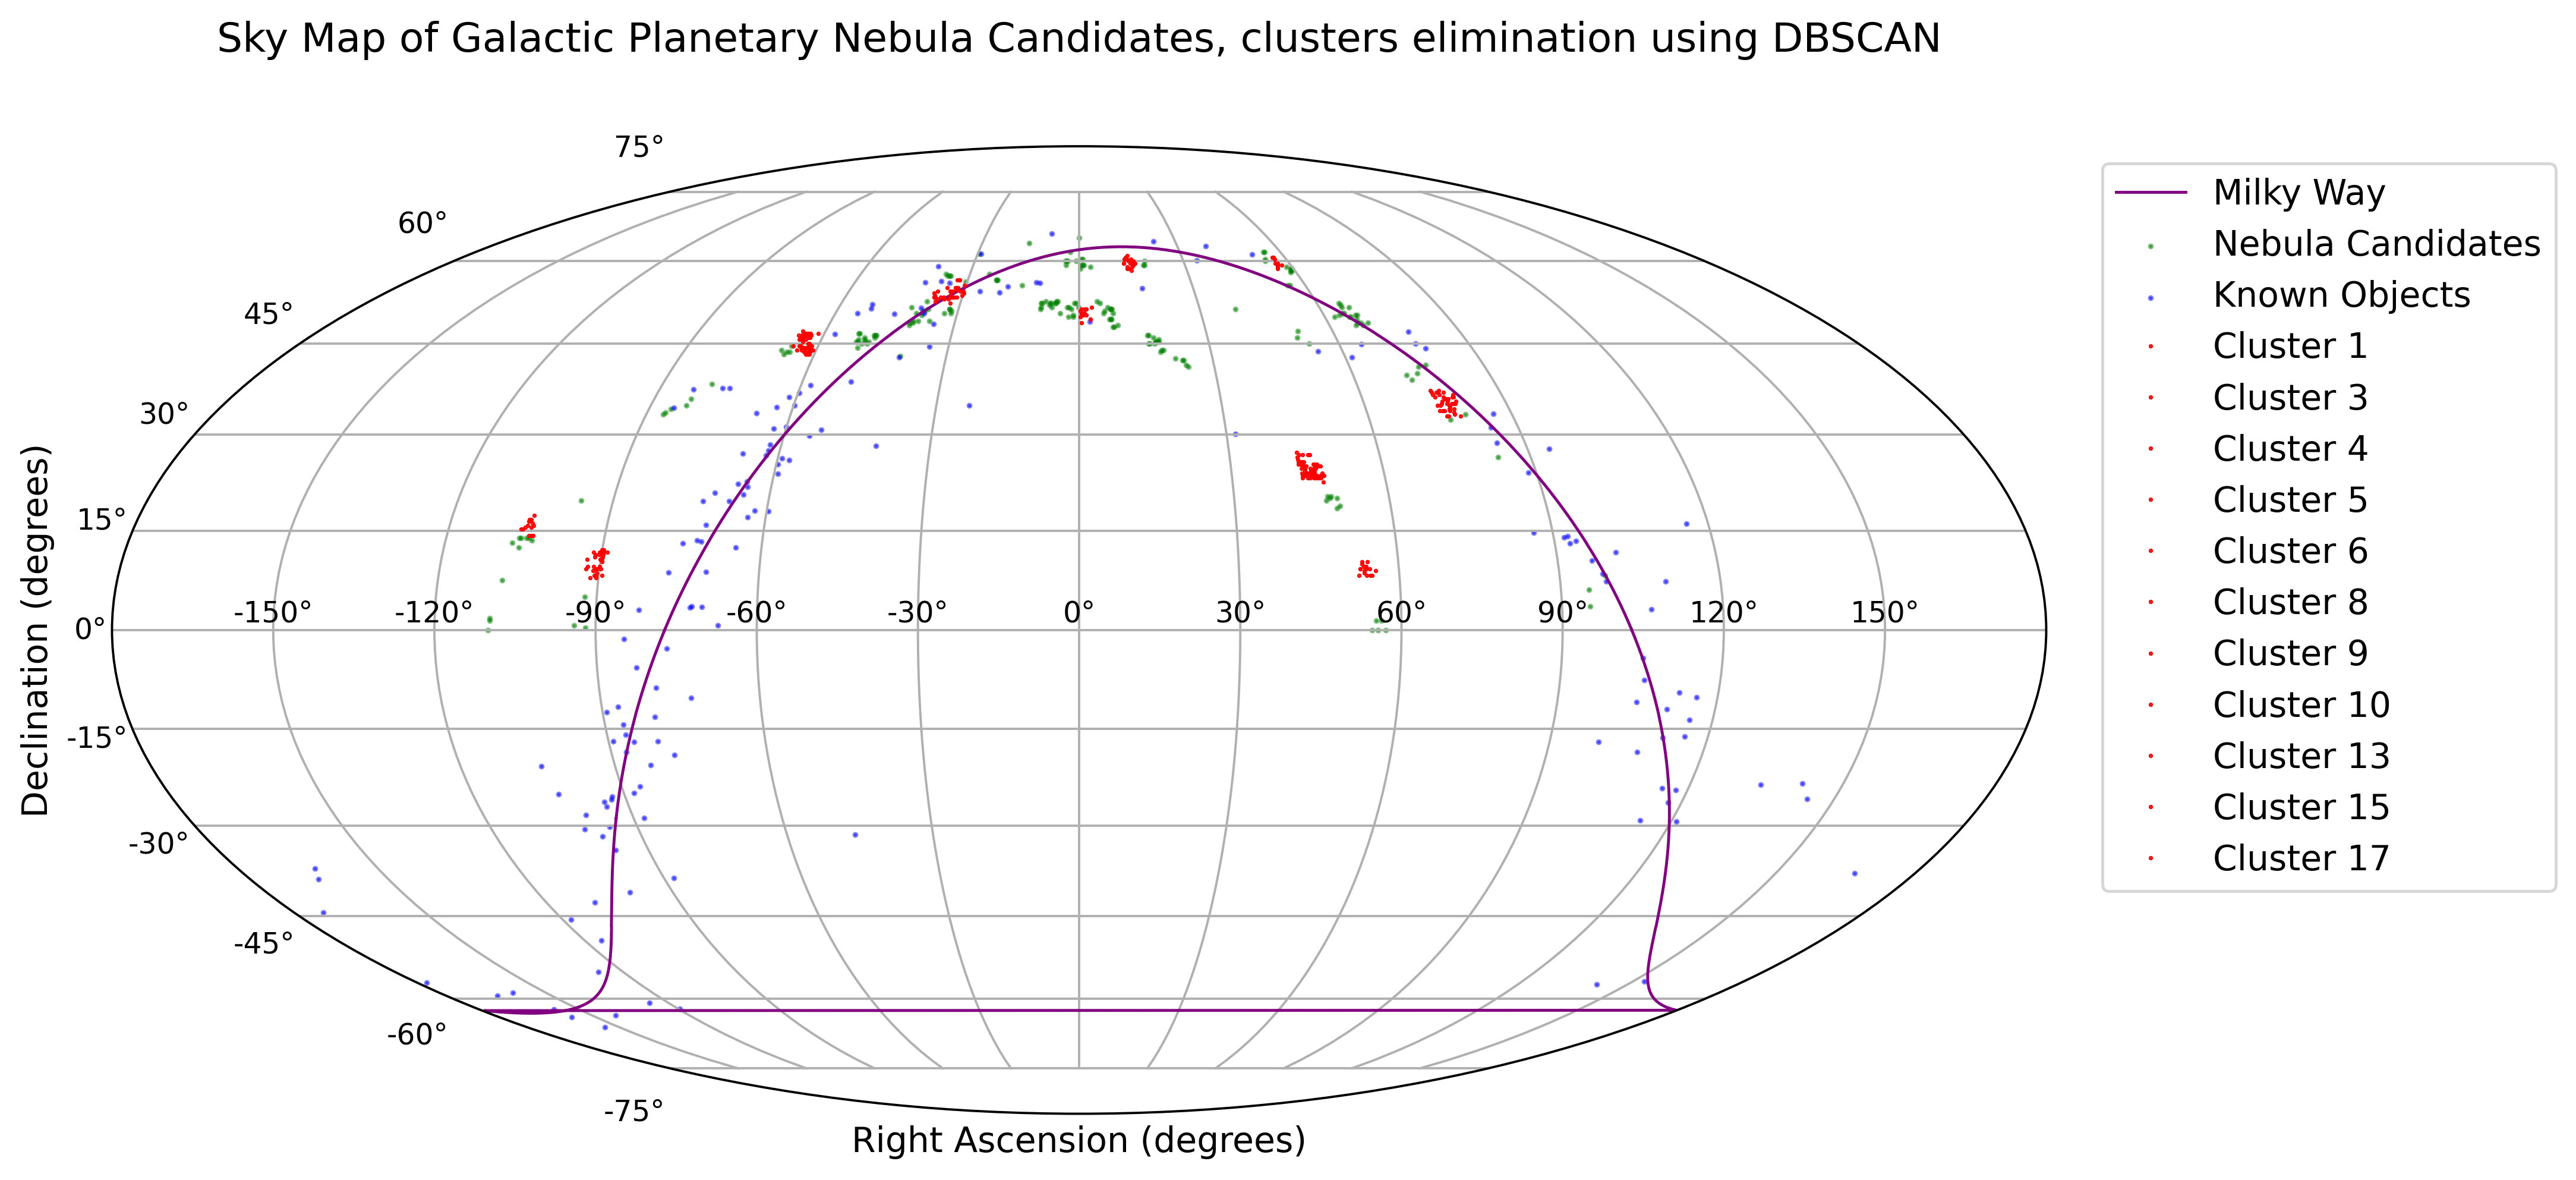

In [21]:
import os
import csv
import cv2
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Galactic
import astropy.units as u
import re
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

def ra_molweid_to_degree(ra_molweid):
    ra = 0
    if ra_molweid < 0:
        ra = -ra_molweid
    else:
        ra = 360 - ra_molweid
    
    return ra

def deg_to_hms(deg):
    hours = int(deg / 15)
    minutes = int((deg / 15 - hours) * 60)
    seconds = ((deg / 15 - hours) * 60 - minutes) * 60
    return f"{hours:02}:{minutes:02}:{seconds:.2f}"

def deg_to_dms(deg):
    abs_deg = abs(deg)
    d = int(abs_deg)
    m = int((abs_deg - d) * 60)
    s = (abs_deg - d - m / 60) * 3600
    if deg < 0:
        d = -d
    return f"{d:+03}:{m:02}:{s:.1f}"

def is_narrow_square_cluster(cluster, min_points=10, aspect_ratio_threshold=1.5):
    if len(cluster) < min_points:
        return False

    ra_values = [coord.ra.degree for coord in cluster]
    dec_values = [coord.dec.degree for coord in cluster]

    ra_range = max(ra_values) - min(ra_values)
    dec_range = max(dec_values) - min(dec_values)

    if ra_range == 0 or dec_range == 0:
        return False

    aspect_ratio = max(ra_range / dec_range, dec_range / ra_range)
    return aspect_ratio <= aspect_ratio_threshold

# Define the function to write the not-in-cluster coordinates to a CSV file
def write_not_in_cluster_to_csv(not_in_cluster, filename):
    with open(filename, "w", newline="") as csvfile:
        writer = csv.writer(csvfile, delimiter=';')
        
        # Write the header row
        writer.writerow(["RA", "DEC", "CERTAINTY", "FOV", "NUMBER"])
        writer.writerow(["-------", "-------", "-------", "-------", "-------"])
        
        # Write the data for each point not in any cluster
        for i,coord in enumerate(not_in_cluster):
            ra_str = deg_to_hms(ra_molweid_to_degree(coord.ra.value))
            dec_str = deg_to_dms(coord.dec.value)
            certainty = coord.certainty
            fov = coord.fov
            writer.writerow([ra_str, dec_str, certainty, fov, f"AIP : {i}"])

# Define the path to the directory containing the images
image_dir = "nebulae/"

# Create empty lists to store the coordinates
coords_n = []
coords_c = []

# Loop through the images in the directory
for filename in os.listdir(image_dir):
    # Extract the ra and dec values from the filename
    filename_parts = filename.split("_")
    ra = float(filename_parts[1])
    dec = float(filename_parts[2])
    # Extract the certainty value from the filename
    certainty = float(re.search(r'\d+', filename).group())
    # Extract the FOV value from the filename
    fov = float(filename.split("_")[-1].split('.jpg')[0])
    # Only add the coordinate to the list if the certainty is 92 or greater and the FOV is larger than 200
    if certainty >= 60 and fov > 0.3:
        # Convert the ra and dec to a SkyCoord object
        c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
        # Add the certainty and fov values as attributes to the SkyCoord object
        c.certainty = certainty
        c.fov = fov
        # Add the coordinate to the nebulae list
        coords_n.append(c)

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('output33.csv')

# Convert the RA and DEC columns to astropy SkyCoord objects and add them to the CSV list
coords_c = SkyCoord(df['RA'], df['DEC'], unit=(u.hourangle, u.deg))

# Define the DBSCAN parameters
eps = 1.5
min_samples = 10

# Create a DBSCAN object
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Convert the nebula coordinates to a numpy array
nebula_coords = np.array([(coord.ra.degree, coord.dec.degree) for coord in coords_n])

# Fit the DBSCAN model to the data
dbscan.fit(nebula_coords)

# Get the labels assigned to each point by the DBSCAN model
labels = dbscan.labels_

# Get the number of clusters found by the DBSCAN model
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {n_clusters}")

# Define the range of Galactic longitudes to generate coordinates for
l_range = np.linspace(0, 360, 1000) * u.deg

# Generate a grid of coordinates along the Milky Way's path
mw_coords_galactic = SkyCoord(l=l_range, b=0*u.deg, frame=Galactic())
mw_coords = mw_coords_galactic.transform_to('icrs')

# Create a list of empty clusters
clusters = [[] for _ in range(n_clusters)]

# Assign each coordinate toa cluster based on the labels assigned by the DBSCAN model
for i, label in enumerate(labels):
    if label != -1:
        clusters[label].append(coords_n[i])

# Define a list of colors to use for the clusters
colors = ['red']

# Plot the clusters and Milky Way coordinates on a sky chart
fig = plt.figure(figsize=(12,8), dpi = 350)
ax = fig.add_subplot(111, projection="mollweide")
ax.grid(True)

# Plot the Milky Way coordinates as a red line
# Prevent first and last points from being connectd 

ax.plot(mw_coords.ra.wrap_at(180*u.deg).radian, mw_coords.dec.radian, color="purple", lw=1, label="Milky Way")

# Create a list of points that don't belong to any cluster
not_in_cluster = [coords_n[i] for i, label in enumerate(labels) if label == -1]

# Write the points not in any cluster to a CSV file
write_not_in_cluster_to_csv(not_in_cluster, "nebula_not_in_clusters.csv")

# Plot the points that are not part of any cluster as green dots
ax.scatter([coord.ra.wrap_at(180*u.deg).radian for coord in not_in_cluster], [coord.dec.radian for coord in not_in_cluster], color='green', s=1, label='Nebula Candidates', alpha=0.5)

# Plot the known objects as blue dots
ax.scatter(coords_c.ra.wrap_at(180*u.deg).radian, coords_c.dec.radian, color='blue', s=1, label='Known Objects', alpha=0.5)

# Plot the nebula clusters as blue dots, with each cluster in a different color
for i, cluster in enumerate(clusters):
    if len(cluster) > 0 and is_narrow_square_cluster(cluster):
        coords_ra = [coord.ra.wrap_at(180*u.deg).radian for coord in cluster]
        coords_dec = [coord.dec.radian for coord in cluster]
        color = colors[i % len(colors)]
        ax.plot(coords_ra, coords_dec, ".", markersize=1, color=color, label=f"Cluster {i+1}")

# Set the plot title and legend
ax.set_xlabel('Right Ascension (degrees)', fontsize=12)
ax.set_ylabel('Declination (degrees)', fontsize=12)
plt.title('Sky Map of Galactic Planetary Nebula Candidates, clusters elimination using DBSCAN', fontsize=14, y=1.08)
ax.legend(fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the plot
plt.show()

In [19]:
import csv

# Create the output file and open it for writing
with open('planetary_nebula_all.csv', 'w', newline='') as output_file:
    # Create a CSV writer object
    writer = csv.writer(output_file, delimiter=';')

    # Write the header row
    writer.writerow(['AD', 'DEC', 'NOM', 'DIMENSION', 'STATUT'])
    writer.writerow(['-------', '-------', '-------', '-------', '-------'])

    # Open the input file and loop through the lines
    with open('planetary_nebula_all.txt', 'r') as input_file:
        for line in input_file:
            # Split the line into fields
            fields = line.strip().split('\t')

            # Set the last field to an empty string if the line has fewer than six fields
            if len(fields) < 6:
                fields += ['']

            # Write the fields to the CSV file
            writer.writerow([fields[2], fields[3], fields[0], fields[4], fields[5]])